In [34]:
#Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics , model_selection
## Import the Classifier.
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [35]:
cars_data = pd.read_csv("../input/car-evaluation-datacset/car.csv")
cars_data.head()
cars_data=cars_data[[
    "buying",
    "maint",
    "doors",
    "persons",
    "lug_boot",
    "safety",
    "class"
]].dropna(axis=0, how='any')

In [36]:
#The target variable is marked as class in the dataframe. 
#The values are present in string format.We can convert the string nominal values into numerics values using factorize method of the pandas library.

cars_data['class'],class_names = pd.factorize(cars_data['class'])
cars_data['buying'],_ = pd.factorize(cars_data['buying'])
cars_data['maint'],_ = pd.factorize(cars_data['maint'])
cars_data['doors'],_ = pd.factorize(cars_data['doors'])
cars_data['persons'],_ = pd.factorize(cars_data['persons'])
cars_data['lug_boot'],_ = pd.factorize(cars_data['lug_boot'])
cars_data['safety'],_ = pd.factorize(cars_data['safety'])
cars_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [37]:
#Select the feature and target variable
#X = cars_data.iloc[:,:-1]
#y = cars_data.iloc[:,-1]

X = cars_data[cars_data.columns[: -1]]
y = cars_data['class']


#To split data (e.g. test=200)
#X_train200, X_test200, y_train200, y_test200 = model_selection.train_test_split(X, y, test_size=0.12)

#To split data in order (e.g. First 1589 records Train= 1589 Test=139)
train_pct_index = int(0.92 * len(X))
X_train, X_test200 = X[:train_pct_index], X[train_pct_index:]
y_train, y_test200 = y[:train_pct_index], y[train_pct_index:]

#To split data in order (e.g. First 1261 records)
#train_pct_index = int(0.73 * len(X))
#X_train, X_test = X[:train_pct_index], X[train_pct_index:]
#y_train, y_test = y[:train_pct_index], y[train_pct_index:]

#To split data in order (e.g. First 760 records)
#train_pct_index = int(0.44 * len(X))
#X_train, X_test = X[:train_pct_index], X[train_pct_index:]
#y_train, y_test = y[:train_pct_index], y[train_pct_index:]

#To split data in order (e.g. First 501 records)
#train_pct_index = int(0.29 * len(X))
#X_train, X_test = X[:train_pct_index], X[train_pct_index:]
#y_train, y_test = y[:train_pct_index], y[train_pct_index:]



In [38]:
#Training / model fitting
random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=123)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [39]:
y_pred = random_forest.predict(X_test200)
print("Accuracy:",metrics.accuracy_score(y_test200, y_pred))
count_misclassified = (y_test200 != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Accuracy: 1.0
Misclassified samples: 0


In [40]:
print(classification_report(y_test200, y_pred))
confusion_mc = pd.DataFrame(
    confusion_matrix(y_test200, y_pred),
    columns=['unacc', 'acc', 'vgood',  'good'],
    index=['unacc', 'acc', 'vgood',  'good']
)
print(confusion_mc) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         9

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

       unacc  acc  vgood  good
unacc    100    0      0     0
acc        0   27      0     0
vgood      0    0      3     0
good       0    0      0     9


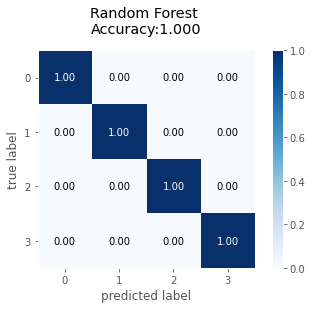

<Figure size 720x576 with 0 Axes>

In [41]:
confusion_mc = confusion_matrix(y_test200, y_pred)
#class_names = ['unacc', 'acc', 'vgood',  'good']
fig, ax = plot_confusion_matrix(conf_mat=confusion_mc,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(y_test200, y_pred)))
plt.figure(figsize=(10,8))
plt.show()

In [42]:
# To avoid Zero Devision Warning
#from sklearn.metrics import f1_score
#metrics.f1_score(y_test, y_pred,average='weighted', labels=np.unique(y_pred))

In [43]:
confusion_mc = confusion_mc.astype('float') / confusion_mc.sum(axis=1)[:, np.newaxis]
print("Per Class Classification Matrix:",confusion_mc.diagonal())

Per Class Classification Matrix: [1. 1. 1. 1.]


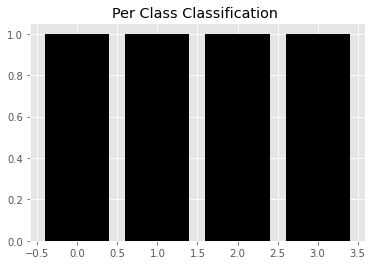

In [44]:
plt.bar(range(4),confusion_mc.diagonal(),color = 'black', align = 'center')
plt.title("Per Class Classification ") 
plt.style.use('ggplot')
plt.show()